In [ ]:
#№Ханаев Антон ИАД5
#Этот кернел удаляет все дубликаты картинок данных и используется как датасет для другого кернела

In [1]:
import numpy as np
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
os.listdir('../input/chinese-char-recognition-smmo19')

['random_labels.csv',
 'train-1.npy',
 'train-2.npy',
 'train-3.npy',
 'train-4.npy',
 'test.npy']

In [3]:
path = Path('../input/chinese-char-recognition-smmo19')
# load data
targets = pd.read_csv(path / 'random_labels.csv')
train = [np.load((path / ('train-' + str(i) + '.npy')), allow_pickle=True) for i in range(1, 5)]
val = train.pop()
test = np.load(path / 'test.npy', allow_pickle=True)

In [4]:
targets.head()

,Id,Category
0,1,61362
1,2,62644
2,3,60861
3,4,59082
4,5,62133


In [5]:
sample = train[0][0]
img, label = sample

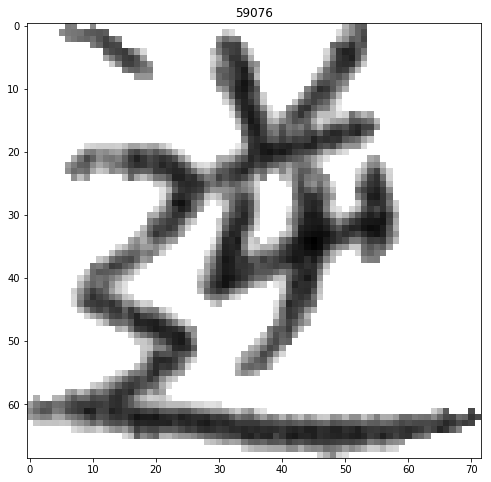

In [6]:
plt.figure(figsize=(12, 8))
plt.title(str(label))
plt.imshow(img, cmap='Greys_r')

In [7]:
train = np.concatenate(train, axis=0)

In [8]:
labels = train[:, 1]

In [9]:
labels_unq, occ = np.unique(labels, return_counts=True)

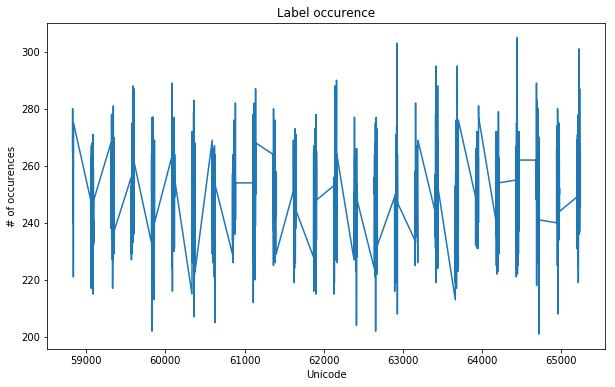

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(labels_unq, occ)
plt.title('Label occurence')
plt.xlabel('Unicode')
plt.ylabel('# of occurences')
plt.show()

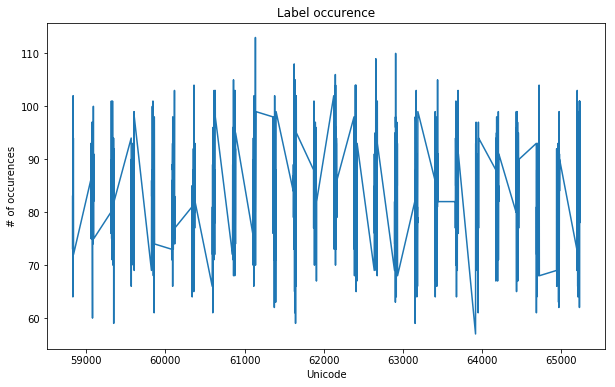

In [11]:
val_labels = val[:, 1]
val_labels_unq, val_occ = np.unique(val_labels, return_counts=True)
plt.figure(figsize=(10, 6))
plt.plot(val_labels_unq, val_occ)
plt.title('Label occurence')
plt.xlabel('Unicode')
plt.ylabel('# of occurences')
plt.show()

# Скачки - нормально?

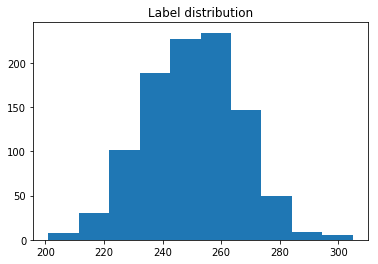

In [12]:
plt.figure(figsize=(6, 4))
plt.hist(sorted(occ))
plt.title('Label distribution')
plt.show()

# Распределение таргета - гауссово

In [13]:
max_occ = max(occ)
max_occ_label = labels_unq[occ==max_occ]

In [14]:
max_occ_img = train[train[:, 1] == max_occ_label, 0]

<Figure size 1440x1440 with 0 Axes>

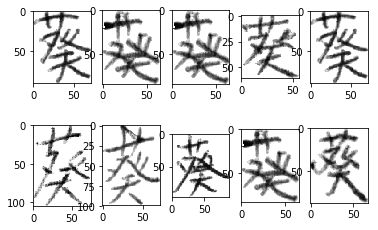

In [15]:
plt.figure(figsize=(20, 20))
fig, axs = plt.subplots(2, 5)
for i in range(2):
    for j in range(5):
        axs[i, j].imshow(max_occ_img[i*5+j], cmap='Greys_r')
plt.show()

# ДУБЛИКАТЫ В ДАННЫХ!!
# Также разный размер картинок

In [16]:
def remove_duplicates(max_occ_img):
    l = [max_occ_img[0]]
    for img in range(1, len(max_occ_img)):
        dupl = False
        for l_img in l:
            if np.all(l_img == max_occ_img[img]):
                dupl = True
                break
        if not dupl:
            l.append(max_occ_img[img])
    return l

In [17]:
wodupl = remove_duplicates(max_occ_img)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


<Figure size 1440x1440 with 0 Axes>

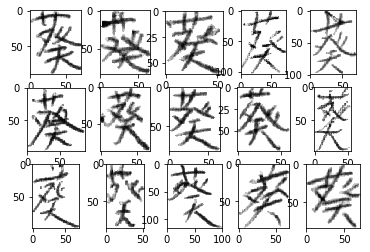

In [18]:
plt.figure(figsize=(20, 20))
fig, axs = plt.subplots(3, 5)
for i in range(3):
    for j in range(5):
        axs[i, j].imshow(wodupl[i*5+j], cmap='Greys_r')
plt.show()

# А есть ли дубликаты в тесте?

In [19]:
def remove_duplicates_cnt(max_occ_img):
    l = [max_occ_img[0]]
    for img in range(1, len(max_occ_img)):
        dupl = False
        for l_img in l:
            if np.all(l_img == max_occ_img[img]):
                dupl = True
                break
        if not dupl:
            l.append(max_occ_img[img])
        if img == 2500:
            break
    return len(l), img

In [20]:
remove_duplicates_cnt(test)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


(2491, 2500)

# А они из трейна или нет

In [21]:
cnt = 0
for img in test:
    if np.all(max_occ_img[13] == img):
        cnt += 1
        break

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
cnt

0

# Нет, значит выбрасываем дубликаты

In [23]:
full_train = [np.load((path / ('train-' + str(i) + '.npy')), allow_pickle=True) for i in range(1, 5)]
full_train = np.concatenate(full_train)

In [24]:
def remove_duplicates(max_occ_img_2):
    max_occ_img = max_occ_img_2[:, 0]
    labels = max_occ_img_2[:, 1]
    l = [max_occ_img[0]]
    lab = [labels[0]]
    for img in range(1, len(max_occ_img)):
        dupl = False
        for l_img in l:
            if np.all(l_img == max_occ_img[img]):
                dupl = True
                break
        if not dupl:
            l.append(max_occ_img[img])
            lab.append(labels[img])
    return l, lab

In [25]:
l = []
lab = []
i = 0
for label in labels_unq:
    imgs, labels = remove_duplicates(full_train[full_train[:, 1] == label, :])
    l.append(imgs)
    lab.append(labels)
    i += 1
    if i % 100 == 0:
        print(i)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if __name__ == '__main__':


100
200
300
400
500
600
700
800
900
1000


In [26]:
len(l)

1000

In [27]:
l_1 = np.concatenate(l)
lab_1 = np.concatenate(lab)

In [28]:
lab_1.shape

(166460,)

In [29]:
np.save('imgs.npy', l_1)
np.save('labels.npy', lab_1)

In [30]:
os.listdir()

['imgs.npy', '__output__.json', '__notebook__.ipynb', 'labels.npy']